In [1]:
import tensorflow as tf
import PIL
import os
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Using TensorFlow backend.


TensorFlow version: 2.0.0
Is using GPU? False


In [2]:
import zipfile
with zipfile.ZipFile("dataa.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [0]:
pip install pillow

In [2]:
df_train=pd.read_csv("data/dataset/train.csv")

In [0]:
df_train.to_csv('train_pixel_orig.csv')

In [0]:
df_train.head()

,Image,target,pixels
0,96.jpg,manipuri,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,163.jpg,bharatanatyam,"[16, 8, 9, 16, 8, 9, 16, 8, 9, 17, 9, 10, 17, ..."
2,450.jpg,odissi,"[11, 14, 18, 12, 15, 19, 13, 16, 20, 14, 17, 2..."
3,219.jpg,kathakali,"[7, 21, 27, 6, 20, 26, 5, 19, 25, 5, 19, 25, 6..."
4,455.jpg,odissi,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [3]:
df_test=pd.read_csv("test.csv")

In [3]:
# load and display an image with Matplotlib
import cv2
import glob2
import numpy as np
import re
from matplotlib import image
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
pd.options.mode.chained_assignment = None
files = glob2.glob ("data/dataset/train/*.jpg")
train_image=[]
for i in files:
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  img=image.img_to_array(img)
  img=img/255
  train_image.append(img)
X=np.array(train_image)


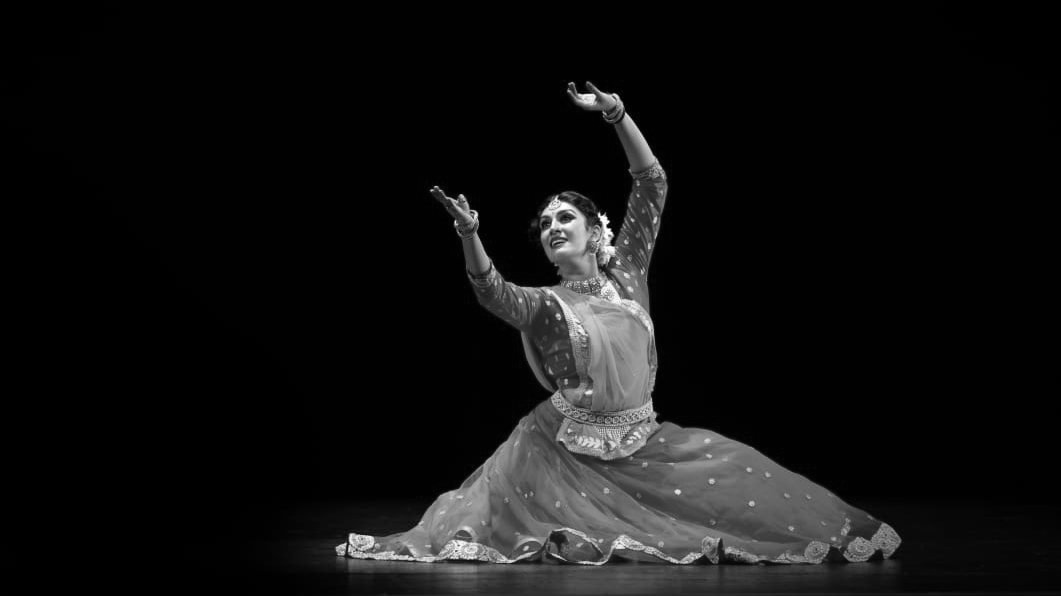

In [11]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("sample_data/train/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [0]:
y=df_train['target']

y.replace({'manipuri':1, 'bharatanatyam':2, 'odissi':3, 'kathakali':4, 'kathak':5,'sattriya':6, 'kuchipudi':7, 'mohiniyattam':8}, inplace=True)


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
y=df_train['target']
code = np.array(y)

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)
from keras.utils import to_categorical

y=to_categorical(vec)

In [5]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
model.fit(X,y, epochs=10)

Epoch 1/10
364/364 [==============================] - ETA: 3s - loss: 70.8721 - accuracy: 0.187 - ETA: 1s - loss: 92.9903 - accuracy: 0.171 - ETA: 1s - loss: 102.5582 - accuracy: 0.18 - ETA: 0s - loss: 106.2535 - accuracy: 0.17 - ETA: 0s - loss: 101.8356 - accuracy: 0.16 - ETA: 0s - loss: 91.8862 - accuracy: 0.1510 - ETA: 0s - loss: 83.6816 - accuracy: 0.156 - ETA: 0s - loss: 76.3777 - accuracy: 0.152 - ETA: 0s - loss: 69.2321 - accuracy: 0.149 - ETA: 0s - loss: 63.2830 - accuracy: 0.146 - ETA: 0s - loss: 58.0757 - accuracy: 0.144 - 1s 3ms/step - loss: 56.2752 - accuracy: 0.1456
Epoch 2/10
364/364 [==============================] - ETA: 0s - loss: 3.5763 - accuracy: 0.18 - ETA: 0s - loss: 3.3992 - accuracy: 0.15 - ETA: 0s - loss: 3.1866 - accuracy: 0.16 - ETA: 0s - loss: 3.0684 - accuracy: 0.17 - ETA: 0s - loss: 3.0516 - accuracy: 0.15 - ETA: 0s - loss: 3.0433 - accuracy: 0.15 - ETA: 0s - loss: 2.9485 - accuracy: 0.15 - ETA: 0s - loss: 2.8782 - accuracy: 0.14 - ETA: 0s - loss: 2.8014 -

In [4]:
import ipykernel

In [0]:
df_encode=df_train
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
encode = onehotencoder.fit_transform(df_encode.target.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(encode)
#print(dfOneHot) 
df = pd.concat([df_encode, dfOneHot], axis=1)
df=df.drop(['Image','target','pixels'],axis=1)

In [0]:

adf

,Image,target,pixels,0,1,2,3,4,5,6,7
0,96.jpg,manipuri,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,163.jpg,bharatanatyam,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,450.jpg,odissi,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,219.jpg,kathakali,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,455.jpg,odissi,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
359,72.jpg,manipuri,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
360,253.jpg,mohiniyattam,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
361,404.jpg,kuchipudi,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
362,89.jpg,manipuri,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
train_pixel.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
df_train=pd.read_csv("train_pixel_orig.csv")

In [0]:
trainX=df_train.loc[:,['pixels']]

In [0]:
trainY=df_train.loc[:,['target']]
trainY.head()

,target
0,manipuri
1,bharatanatyam
2,odissi
3,kathakali
4,odissi


In [0]:
trainY.target.unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [0]:
trainY["target"].replace({'manipuri':1, 'bharatanatyam':2, 'odissi':3, 'kathakali':4, 'kathak':5,'sattriya':6, 'kuchipudi':7, 'mohiniyattam':8}, inplace=True)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(600,600,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))
model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))

In [0]:
for key,value in trainX.iteritems():
  trainX[key]=trainX[key].to_numpy()
  print(trainX[key])
  


0      [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...
1      [[[16, 8, 9], [16, 8, 9], [16, 8, 9], [17, 9, ...
2      [[[11, 14, 18], [12, 15, 19], [13, 16, 20], [1...
3      [[[7, 21, 27], [6, 20, 26], [5, 19, 25], [5, 1...
4      [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
                             ...                        
359    [[[4, 4, 4], [4, 4, 4], [4, 4, 4], [5, 5, 5], ...
360    [[[38, 34, 33], [39, 35, 34], [40, 36, 35], [3...
361    [[[247, 247, 247], [247, 247, 247], [247, 247,...
362    [[[8, 5, 14], [9, 6, 15], [10, 7, 16], [12, 9,...
363    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: pixels, Length: 364, dtype: object


In [0]:
print(trainX)

                                                pixels
0    [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...
1    [[[16, 8, 9], [16, 8, 9], [16, 8, 9], [17, 9, ...
2    [[[11, 14, 18], [12, 15, 19], [13, 16, 20], [1...
3    [[[7, 21, 27], [6, 20, 26], [5, 19, 25], [5, 1...
4    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
..                                                 ...
359  [[[4, 4, 4], [4, 4, 4], [4, 4, 4], [5, 5, 5], ...
360  [[[38, 34, 33], [39, 35, 34], [40, 36, 35], [3...
361  [[[247, 247, 247], [247, 247, 247], [247, 247,...
362  [[[8, 5, 14], [9, 6, 15], [10, 7, 16], [12, 9,...
363  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

[364 rows x 1 columns]


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test, y_test))

Train on 254 samples, validate on 110 samples
Epoch 1/10


In [44]:
model.save('model_jupyter_400_400.h5')

In [0]:
model = keras.models.load_model('model_200_300_100epochs.h5')

In [19]:
df_test=pd.read_csv('data/dataset/test.csv')

In [27]:
from keras.preprocessing import image
files = glob2.glob ("data/dataset/test/*.jpg")
train_image=[]
for i in files:
  img=cv2.imread(i)
  #print(img.shape)
  img=cv2.resize(img,(28,28))
  #img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(img.shape)
  img=image.img_to_array(img)
  img=img/255
  out=model.predict_classes(img.reshape(1,28,28,3))
  arr=np.array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak','sattriya', 'kuchipudi', 'mohiniyattam'])
  b=i.split("test")[1]
  b=b.strip('\ ')
  #print(b)
  #print(i)
  #m=re.search(r'\(.+?).', i).group(1)
  #print(m)
#   p=m+".jpg"
#   print(arr[int(m)-1])
  df_test.loc[df_test['Image']==b,'Output']=arr[out-1]
  #print(model.predict_classes(img.reshape(1,800,600,3)),i)
  #train_image.append(img)
#X=np.array(train_image)

In [28]:
df_test.head()

,Image,Output
0,508.jpg,sattriya
1,246.jpg,sattriya
2,473.jpg,sattriya
3,485.jpg,mohiniyattam
4,128.jpg,sattriya


In [29]:
df_test.to_csv('test_28_28.csv')

## Using SVM Classifier

In [7]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [2]:
df_train=pd.read_csv("data/dataset/train.csv")

In [8]:
# load and display an image with Matplotlib
import cv2
import glob2
import numpy as np
import re
from matplotlib import image
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from skimage.transform import resize

pd.options.mode.chained_assignment = None
files = glob2.glob ("data/dataset/train/*.jpg")
train_image=[]
flat_data = []
for i in files:
  img=cv2.imread(i)
  img_resized = resize(img, (600,600), anti_aliasing=True, mode='reflect')
  flat_data.append(img_resized.flatten())
  train_image.append(img_resized)
flat_data = np.array(flat_data)
X=np.array(train_image)


In [23]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
y=df_train['target']
y = np.array(y)

# label_encoder = LabelEncoder()
# vec = label_encoder.fit_transform(code)
# from keras.utils import to_categorical

# y=to_categorical(vec)

In [25]:
y.shape

(364,)

In [21]:
flat_data

array([[0.        , 0.        , 0.        , ..., 0.05494118, 0.03533333,
        0.04317647],
       [0.11764706, 0.13333333, 0.1372549 , ..., 0.1190098 , 0.15038235,
        0.14646078],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.19836275, 0.19444118,
        0.20517974],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.1553462 , 0.19886642,
        0.30359988],
       [0.07897821, 0.07897821, 0.07897821, ..., 0.68413943, 0.80791068,
        0.99913943],
       [0.13469608, 0.1072451 , 0.09548039, ..., 0.33320976, 0.34889604,
        0.42084702]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flat_data, y, random_state=42, test_size=0.3)

In [26]:
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV, train_test_split
svc = svm.SVC()
model=svc.fit(flat_data, y)

C:\Users\dmsss\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(X_test)

In [32]:
y_pred

array(['mohiniyattam', 'sattriya', 'mohiniyattam', 'mohiniyattam',
       'bharatanatyam', 'sattriya', 'sattriya', 'sattriya',
       'mohiniyattam', 'sattriya', 'sattriya', 'sattriya', 'sattriya',
       'sattriya', 'odissi', 'sattriya', 'sattriya', 'bharatanatyam',
       'odissi', 'mohiniyattam', 'mohiniyattam', 'mohiniyattam',
       'bharatanatyam', 'sattriya', 'bharatanatyam', 'sattriya',
       'sattriya', 'sattriya', 'mohiniyattam', 'sattriya', 'sattriya',
       'sattriya', 'sattriya', 'mohiniyattam', 'mohiniyattam',
       'mohiniyattam', 'sattriya', 'mohiniyattam', 'mohiniyattam',
       'bharatanatyam', 'sattriya', 'sattriya', 'mohiniyattam',
       'sattriya', 'sattriya', 'mohiniyattam', 'mohiniyattam', 'sattriya',
       'mohiniyattam', 'sattriya', 'sattriya', 'sattriya', 'sattriya',
       'mohiniyattam', 'sattriya', 'mohiniyattam', 'mohiniyattam',
       'mohiniyattam', 'odissi', 'sattriya', 'sattriya', 'odissi',
       'mohiniyattam', 'mohiniyattam', 'odissi', 'sattriy

In [20]:
X_train.shape

(254, 500, 500, 3)

In [16]:
y_train.shape

(254, 8)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras.preprocessing import image
files = glob2.glob ("data/dataset/test/*.jpg")
train_image=[]
for i in files:
  img=cv2.imread(i)
  img_resized = resize(img, (600,600), anti_aliasing=True, mode='reflect')
  
  #print(img.shape)
#   img=cv2.resize(img,(400,400))
#   img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   #print(img.shape)
#   img=image.img_to_array(img)
#   img=img/255
  out=model.predict((img_resized.flatten()).reshape(1, -1))
  #arr=np.array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak','sattriya', 'kuchipudi', 'mohiniyattam'])
  b=i.split("test")[1]
  b=b.strip('\ ')
  #print(b)
  #print(i)
  #m=re.search(r'\(.+?).', i).group(1)
  #print(m)
#   p=m+".jpg"
#   print(arr[int(m)-1])
  df_test.loc[df_test['Image']==b,'Output']=out
  #print(model.predict_classes(img.reshape(1,800,600,3)),i)
  #train_image.append(img)
#X=np.array(train_image)

In [42]:
test

array([[0.00784314, 0.07254902, 0.        , ..., 0.16078431, 0.26862745,
        0.42352941],
       [0.14921569, 0.14529412, 0.15313725, ..., 0.29019608, 0.29803922,
        0.30196078],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.00229412, 0.03921569,
        0.05490196],
       ...,
       [0.035     , 0.03270588, 0.08990196, ..., 0.03137255, 0.05098039,
        0.09019608],
       [0.        , 0.        , 0.        , ..., 0.01960784, 0.        ,
        0.21486275],
       [0.63216627, 0.56549961, 0.39687216, ..., 0.2684298 , 0.16253725,
        0.01097961]])

In [43]:
pred=clf.predict(test)

In [52]:
pred

array(['mohiniyattam', 'sattriya', 'sattriya', 'mohiniyattam', 'sattriya',
       'mohiniyattam', 'sattriya', 'sattriya', 'sattriya', 'sattriya',
       'mohiniyattam', 'sattriya', 'sattriya', 'mohiniyattam', 'odissi',
       'sattriya', 'sattriya', 'sattriya', 'bharatanatyam', 'sattriya',
       'sattriya', 'bharatanatyam', 'sattriya', 'sattriya', 'sattriya',
       'mohiniyattam', 'mohiniyattam', 'sattriya', 'sattriya',
       'mohiniyattam', 'mohiniyattam', 'sattriya', 'sattriya', 'sattriya',
       'mohiniyattam', 'mohiniyattam', 'sattriya', 'mohiniyattam',
       'mohiniyattam', 'sattriya', 'mohiniyattam', 'mohiniyattam',
       'sattriya', 'mohiniyattam', 'mohiniyattam', 'sattriya',
       'mohiniyattam', 'mohiniyattam', 'odissi', 'mohiniyattam',
       'mohiniyattam', 'mohiniyattam', 'mohiniyattam', 'mohiniyattam',
       'sattriya', 'mohiniyattam', 'mohiniyattam', 'mohiniyattam',
       'mohiniyattam', 'mohiniyattam', 'mohiniyattam', 'sattriya',
       'mohiniyattam', 'mohiniya

In [50]:
from keras.preprocessing import image
files = glob2.glob ("data/dataset/test/*.jpg")
test_image=[]
j=0
for i in files:
  b=i.split("test")[1]
  b=b.strip('\ ')
  df_test.loc[df_test['Image']==b,'Output']=pred[j]
  j+=1


In [64]:
juju=pd.read_csv('new.csv')

In [65]:
juju

,Unnamed: 0,Image,Output
0,0,508.jpg,sattriya
1,1,246.jpg,mohiniyattam
2,2,473.jpg,sattriya
3,3,485.jpg,sattriya
4,4,128.jpg,sattriya
5,5,410.jpg,sattriya
6,6,465.jpg,sattriya
7,7,196.jpg,mohiniyattam
8,8,340.jpg,mohiniyattam
9,9,467.jpg,sattriya


In [28]:
df_test

,Image,Output
0,508.jpg,NaN
1,246.jpg,NaN
2,473.jpg,NaN
3,485.jpg,NaN
4,128.jpg,NaN
5,410.jpg,NaN
6,465.jpg,NaN
7,196.jpg,NaN
8,340.jpg,NaN
9,467.jpg,NaN


In [73]:
df_test.to_csv('new2.csv')

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

## Inception V3 model

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model=InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [8]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [9]:

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x) 
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (8, activation='softmax')(x)           

model = Model( model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

NameError: name 'train_dir' is not defined

In [11]:

callbacks = myCallback()
history = model.fit(
            X,
            y,
            #steps_per_epoch = 100,
            epochs = 10,
            #validation_steps = 50,
            verbose = 2,
            validation_data=(X_test,y_test))

Train on 364 samples, validate on 110 samples
Epoch 1/10
364/364 - 149s - loss: 2.4125 - acc: 0.1401 - val_loss: 2.1316 - val_acc: 0.2000
Epoch 2/10
364/364 - 113s - loss: 1.8839 - acc: 0.3049 - val_loss: 2.2042 - val_acc: 0.2455
Epoch 3/10
364/364 - 113s - loss: 1.5458 - acc: 0.4258 - val_loss: 1.6669 - val_acc: 0.3455
Epoch 4/10
364/364 - 114s - loss: 1.2371 - acc: 0.5577 - val_loss: 1.2853 - val_acc: 0.5455
Epoch 5/10
364/364 - 113s - loss: 0.7944 - acc: 0.7445 - val_loss: 1.2765 - val_acc: 0.5545
Epoch 6/10
364/364 - 113s - loss: 0.6937 - acc: 0.7885 - val_loss: 1.2146 - val_acc: 0.6182
Epoch 7/10
364/364 - 113s - loss: 0.5912 - acc: 0.8269 - val_loss: 0.7152 - val_acc: 0.7455
Epoch 8/10
364/364 - 114s - loss: 0.3087 - acc: 0.9011 - val_loss: 0.7999 - val_acc: 0.7000
Epoch 9/10
364/364 - 115s - loss: 0.3156 - acc: 0.9121 - val_loss: 1.2395 - val_acc: 0.7000
Epoch 10/10
364/364 - 116s - loss: 0.3543 - acc: 0.8956 - val_loss: 0.2880 - val_acc: 0.9000


In [18]:
from keras.preprocessing import image
files = glob2.glob ("data/dataset/test/*.jpg")
test_image=[]
for i in files:
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  img=image.img_to_array(img)
  img = img/255
  #test_image.append(img)
  #img=img/255
  out=model.predict((img).reshape(1,224,224,3))
  prediction=np.argmax(out,axis=1)
  prediction=label_encoder.inverse_transform(prediction)
  #print(prediction)
  #print(np.amax())
#   #arr=np.array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak','sattriya', 'kuchipudi', 'mohiniyattam'])
  b=i.split("test")[1]
  b=b.strip('\ ')
#   #print(b)
#   #print(i)
#   #m=re.search(r'\(.+?).', i).group(1)
#   #print(m)
# #   p=m+".jpg"
# #   print(arr[int(m)-1])
  df_test.loc[df_test['Image']==b,'Output']=prediction
#   #print(model.predict_classes(img.reshape(1,800,600,3)),i)
#   #train_image.append(img)
# test=np.array(test_image)

In [78]:
prediction=model.predict(test)

In [79]:
prediction

array([[5.88595867e-04, 3.03131342e-03, 3.48985195e-05, ...,
        1.25050545e-04, 2.74181366e-06, 3.27825546e-07],
       [2.53915787e-05, 2.33709812e-04, 2.75671482e-05, ...,
        2.87473202e-04, 4.64618206e-05, 1.37895346e-04],
       [0.00000000e+00, 8.94069672e-08, 2.70730346e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.97698784e-06, 2.62063742e-03, 1.62115693e-03, ...,
        2.68220901e-07, 3.24845314e-06, 4.17232513e-07],
       [4.39018011e-04, 1.11446649e-01, 6.30050898e-04, ...,
        1.23858452e-04, 3.44604254e-04, 2.23219395e-05],
       [5.96046448e-08, 1.19775534e-04, 1.90734863e-06, ...,
        1.43051147e-06, 1.54674053e-04, 4.17232513e-07]], dtype=float32)

In [80]:
prediction2=np.amax(prediction,axis=1)

In [81]:
prediction=np.argmax(prediction,axis=1)

In [82]:
prediction

array([4, 4, 2, 1, 1, 2, 1, 3, 5, 0, 3, 5, 4, 6, 3, 0, 1, 1, 1, 4, 6, 0,
       2, 7, 0, 0, 5, 1, 4, 1, 1, 5, 1, 1, 0, 2, 4, 6, 6, 1, 1, 0, 5, 1,
       1, 3, 3, 0, 1, 1, 2, 4, 3, 5, 7, 2, 5, 3, 1, 6, 0, 7, 6, 1, 5, 1,
       5, 3, 6, 1, 3, 1, 2, 1, 2, 3, 6, 2, 7, 6, 5, 6, 4, 5, 3, 1, 1, 6,
       5, 2, 1, 2, 4, 7, 4, 1, 2, 2, 5, 5, 4, 2, 6, 0, 0, 1, 3, 6, 1, 1,
       1, 3, 1, 2, 0, 6, 1, 1, 3, 4, 0, 6, 2, 7, 5, 1, 1, 2, 0, 0, 3, 2,
       1, 2, 0, 6, 1, 6, 1, 1, 1, 0, 5, 5, 1, 4, 0, 3, 3, 4, 3, 0, 2, 1,
       3, 6], dtype=int64)

In [83]:
prediction=label_encoder.inverse_transform(prediction)

In [84]:
p=pd.DataFrame(prediction,columns=['target'])

In [17]:
df_test=pd.read_csv('data/dataset/test.csv')

In [19]:
df_test.head()

,Image,Output
0,508.jpg,bharatanatyam
1,246.jpg,kathak
2,473.jpg,bharatanatyam
3,485.jpg,bharatanatyam
4,128.jpg,kuchipudi


In [86]:
n=pd.concat([df_test,p],axis=1)


In [20]:
df_test.to_csv('shit2.csv')